<a href="https://colab.research.google.com/github/Alex-So-Ma/Fisica_Computacional_2023-1/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 2
####Física Computacional
####Alejandro Soto Malpica

##1. Barra metálica siendo calentada

Muestra las gráficas de barras calentadas instantaneamente en su centro, de 1 a 4 metales en 3 tiempos diferentes.

¿Cuántos metales quieres? (1-4):2
Metales disponibles: 
 0-Cobre 
 1-Hierro 
 2-Plata 
 3-Oro 
 4-Aluminio 
 5-Estaño 
 6-Molibdeno 
 7-Titanio 
 8-Tungsteno 
 9-Zirconio
Metal 1
m=0
Metal 2
m=1
Tiempo 1
t=0.01
Tiempo 2
t=0.1
Tiempo 3
t=1
(296.15615322559484, 380.72078226250886) (291.58339938162237, 476.7486129859308)
(298.7838624821086, 325.53888787571924) (297.33184954180706, 356.031159622052)
(299.6474047223192, 308.0749844668637) (299.1560481381587, 317.7229890991299)


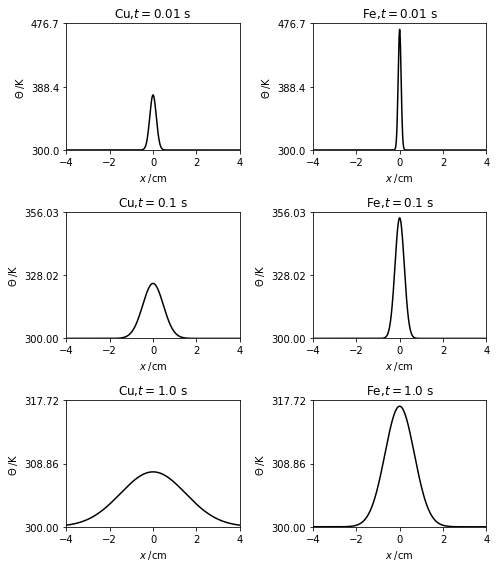

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Metales disponibles para graficar
#Capacidad calorífica por unidad de volumen [J.m-3.K-1]
#Difusividad Térmica [m2.s-1] para Cu y Fe
C=('Cu',3.45e7,113e-6)
H=('Fe',3.5e7,22.8e-6)
P=('Ag',2.44e7,149e-6)
O=('Au',2.49e7,127e-6)
A=('Al',2.42e7,97.5e-6)
E=('Sn',1.66e7,40e-6)
M=('Mo',2.57e7,54.3e-6)
T=('Ti',2.35e7,8.89e-6)
W=('W',2.58e7,76.1e-6)
Z=('Zr',1.85e7,17e-6)

lmetales=(C,H,P,O,A,E,M,T,W,Z)

metal1=()
metal2=()
metal3=()
metal4=()

#Selección de los metales por el usuario
nm=int(input('¿Cuántos metales quieres? (1-4):'))
print('Metales disponibles: \n 0-Cobre \n 1-Hierro \n 2-Plata \n 3-Oro \n 4-Aluminio \n 5-Estaño \n 6-Molibdeno \n 7-Titanio \n 8-Tungsteno \n 9-Zirconio')
i=1
while i<nm+1:
  print('Metal',i)
  m=int(input('m='))
  if i==1:
    metal1=lmetales[m]
    metales = np.array([metal1],dtype=[('symbol', '|S2'),('cp','f8'),('D','f8')])
  elif i==2:
    metal2=lmetales[m]
    metales = np.array([metal1,metal2],dtype=[('symbol', '|S2'),('cp','f8'),('D','f8')])
  elif i==3:
    metal3=lmetales[m]
    metales = np.array([metal1,metal2,metal3],dtype=[('symbol', '|S2'),('cp','f8'),('D','f8')])
  elif i==4:
    metal4=lmetales[m]
    metales = np.array([metal1,metal2,metal3,metal4],dtype=[('symbol', '|S2'),('cp','f8'),('D','f8')])
  i=i+1

#Selección del usuario de los tiempos
tiempo=[]
for i in range(3):
  print('Tiempo', i+1)
  t=float(input('t='))
  tiempo.append(t)
tiempo=tuple(tiempo)

#Dar dimensión en el eje x a la barra metálica
#Consideramos que la barra se extiende de -xlim a xlim [m]
xlim = 0.05
nx = 1000
x = np.linspace(-xlim,xlim,nx)

#Temperatura para t=0
theta0=300
#Seccion transversal de la barra en m3, se le añade en x=0 calor(J)
A = 1.e-4
H = 1.e3

#Creamos un array de subplots (t1 : m_1 | ... | m_{nm} )
#                             (t2 : m_1 | ... | m_{nm} )
#                             (t3 : m_1 | ... | m_{nm} )
fig,axes = plt.subplots(nrows=3, ncols=nm,figsize=(3.5*nm,8))
for j,t in enumerate(tiempo):
  for i,metal in enumerate(metales):
    symbol,cp,D = metal
    ax = axes[j,i]
    # La solución de la Ecuación de Difusión
    theta = theta0+H/cp/A/np.sqrt(D*t *4*np.pi) * np.exp(-x**2/4/D/t)
    ax.plot(x*100,theta,'k')
    ax.set_title('{},$t={}$ s'.format(symbol.decode('utf8'),t))
    ax.set_xlim(-4,4)
    ax.set_xlabel('$x\;/\mathrm{cm}$')
    ax.set_ylabel('$\Theta\;/\mathrm{K}$')
for j in (0,1,2):
  ymax = max(axes[j,0].get_ylim()[1],axes[j,1].get_ylim()[1])
  print(axes[j,0].get_ylim(),axes[j,1].get_ylim())
  for i in(0,1):
    ax = axes[j,i]
    ax.set_ylim(theta0,ymax)
    ### Asegurar que sólo existan 3 únicas marcas en eje y
    ax.set_yticks([theta0,(ymax+theta0)/2,ymax])
fig.tight_layout()
plt.show()

##2. Gráficas de funciones trigonométricas

Genera las gráficas de las funciones: $\sin^2(x)$, $\cos^2(x)$, $\sin^3(x)$, $\cos^3(x)$, $\sin^4(x)$ y $\cos^4(x)$


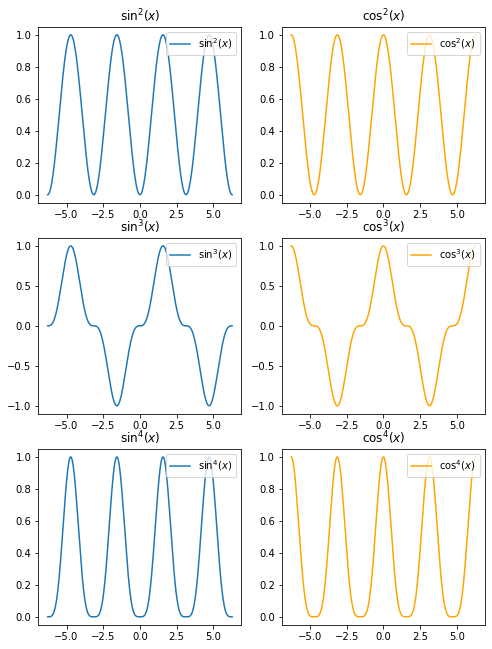

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Definimos una función que indica el exponente sin y cos
def f(i):
  return i+2

#Argumentos de la función
xmin, xmax = -2. * np.pi, 2. * np.pi
x = np.linspace(xmin, xmax, 1000)

#Creamos un array de subplots (**2 : sin | cos )
#                             (**3 : sin | cos )
#                             (**4 : sin | cos )
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(8,11))


#Ciclos for, se van haciendo las gráficas por filas, primero sin yluego cos
for i in range(0,3):
  for j in range(0,2):
    if j==0:
      eje1 = ax[i,j]
      eje1.plot(x,np.sin(x)**f(i),label='$\sin^{var}(x)$'.format(var=f(i)))
      eje1.title.set_text('$\sin^{var}(x)$'.format(var=f(i)))
      eje1.legend(loc='upper right')
    elif j==1:
      eje2 = ax[i,j]
      eje2.plot(x,np.cos(x)**f(i),label='$\cos^{var}(x)$'.format(var=f(i)),color='orange')
      eje2.title.set_text('$\cos^{var}(x)$'.format(var=f(i)))
      eje2.legend(loc='upper right')

##3. Semillas de girasol

Grafica las posiciones de las semillas de un girasol.

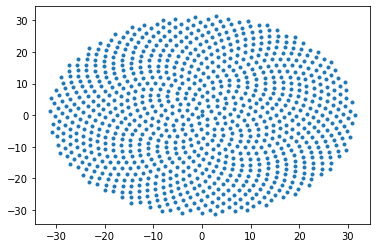

In [ ]:
import math
import matplotlib.pyplot as plt

#Proporció áurea
p = (1+math.sqrt(5))/2

#Número de semillas a graficar
n = 1000
x = [0.] * n
y = [0.] * n

for i in range(n):
    #Coordenadas polares de semilla i
    x[i] = math.sqrt(i)*math.cos(2*math.pi*i/p)
    y[i] = math.sqrt(i)*math.sin(2*math.pi*i/p)

plt.plot(x,y,'.')
plt.show()